# Dimensionality Reduction - Visualizzazione

In [5]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict

from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.tree import DecisionTreeClassifier

## Caricamento Dataset

In [6]:
train = pd.read_csv('../data/csv_files/train.csv')
X_train = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_train = train['Activity']


In [7]:
test = pd.read_csv('../data/csv_files/test.csv')
X_test = test.drop(['subject', 'Activity','ActivityName'], axis=1)
y_test = test['Activity']

# Random Subspace Projection

In [5]:
from sklearn import random_projection

In [6]:
rsp = random_projection.GaussianRandomProjection(n_components=2)
X_train_rsp = rsp.fit_transform(X_train)
X_train_rsp.shape

(7352, 2)

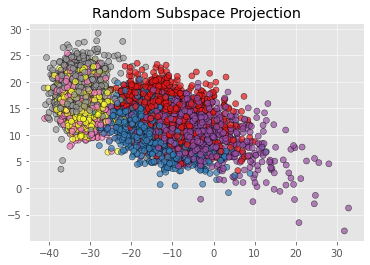

In [35]:
plt.scatter(X_train_rsp[:, 0], X_train_rsp[:, 1], c=y_train, cmap='Set1', edgecolor='k', alpha=0.7)
plt.title('Random Subspace Projection')
#plt.cm.prism
plt.grid(1, ls='-', color='white', alpha=0.5, lw=1)
plt.style.use('ggplot')
plt.show()


In [8]:
X_test_rsp = rsp.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_rsp, y_train)

y_pred = clf.predict(X_test_rsp)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.4387512724804886
F1-score [0.48299913 0.47402597 0.37430168 0.37051406 0.40954274 0.49719626]
              precision    recall  f1-score   support

           1       0.43      0.56      0.48       496
           2       0.48      0.46      0.47       471
           3       0.45      0.32      0.37       420
           4       0.35      0.39      0.37       491
           5       0.43      0.39      0.41       532
           6       0.50      0.50      0.50       537

    accuracy                           0.44      2947
   macro avg       0.44      0.44      0.43      2947
weighted avg       0.44      0.44      0.44      2947



# Multi Dimensional Scaling

In [18]:
from sklearn.manifold import MDS

In [ ]:
mds = MDS(n_components=2)
X_train_mds = mds.fit_transform(X_train)
X_train_mds.shape

In [ ]:
plt.scatter(X_train_mds[:, 0], X_train_mds[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [15]:
#X_test_mds = mds.transform(X_test) # no transform

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_mds, y_train)

y_pred = clf.predict(X_train_mds)

print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))

Accuracy 0.8672755538282161
F1-score [0.83562397 0.83184626 0.83118849 0.85051268 0.87466949 0.9564326 ]
              precision    recall  f1-score   support

           1       0.79      0.89      0.84       858
           2       0.86      0.81      0.83       751
           3       0.87      0.80      0.83       690
           4       0.83      0.88      0.85       900
           5       0.89      0.86      0.87       962
           6       0.97      0.95      0.96       985

    accuracy                           0.87      5146
   macro avg       0.87      0.86      0.86      5146
weighted avg       0.87      0.87      0.87      5146



# IsoMap

In [21]:
from sklearn.manifold import Isomap

In [22]:
iso = Isomap(n_components=2)
X_train_iso = iso.fit_transform(X_train)
X_train_iso.shape

C:\Users\info\anaconda3\lib\site-packages\sklearn\manifold\_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 5 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\info\anaconda3\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\info\anaconda3\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\info\anaconda3\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\info\anaconda3\lib\site-p

(7352, 2)

In [ ]:
plt.scatter(X_train_iso[:, 0], X_train_iso[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [19]:
#X_test_mds = mds.transform(X_test) # no transform

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_iso, y_train)

y_pred = clf.predict(X_train_iso)

print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))

Accuracy 0.9284881461329187
F1-score [0.9220339  0.9346049  0.91967576 0.89643836 0.90210526 0.99087221]
              precision    recall  f1-score   support

           1       0.89      0.95      0.92       858
           2       0.96      0.91      0.93       751
           3       0.94      0.90      0.92       690
           4       0.88      0.91      0.90       900
           5       0.91      0.89      0.90       962
           6       0.99      0.99      0.99       985

    accuracy                           0.93      5146
   macro avg       0.93      0.93      0.93      5146
weighted avg       0.93      0.93      0.93      5146



# t-SNE

In [20]:
from sklearn.manifold import TSNE

In [21]:
tsne = TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(X_train)
X_train_tsne.shape

(5146, 2)

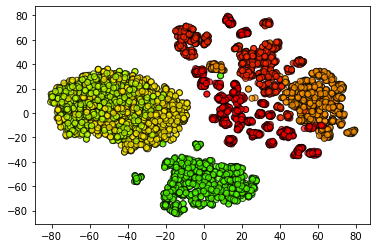

In [22]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [23]:
#X_test_mds = mds.transform(X_test) # no transform

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_tsne, y_train)

y_pred = clf.predict(X_train_tsne)

print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))

Accuracy 0.9807617567042363
F1-score [0.99825277 0.996      0.99492386 0.94977679 0.95499224 0.99746322]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       858
           2       1.00      0.99      1.00       751
           3       1.00      0.99      0.99       690
           4       0.95      0.95      0.95       900
           5       0.95      0.96      0.95       962
           6       1.00      1.00      1.00       985

    accuracy                           0.98      5146
   macro avg       0.98      0.98      0.98      5146
weighted avg       0.98      0.98      0.98      5146



### TSNE 2

In [8]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')


performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.015s...


C:\Users\info\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\info\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 7352 samples in 3.129s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.597464
[t-SNE] Computed conditional probabilities in 0.040s
[t-SNE] Iteration 50: error = 124.7563248, gradient norm = 0.0272025 (50 iterations in 3.557s)
[t-SNE] Iteration 100: error = 107.1798859, gradient norm = 0.0255741 (50 iterations in 2.974s)
[t-SNE] Iteration 150: error = 101.0172882, gradient norm = 0.0200541 (50 iterations in 2.725s)
[t-SNE] Iteration 200: error = 97.5974960, gra

C:\Users\info\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


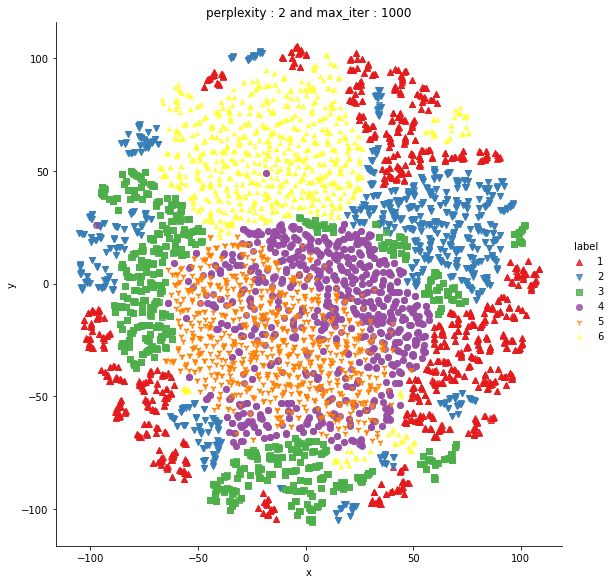

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.013s...


C:\Users\info\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\info\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 7352 samples in 3.105s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961446
[t-SNE] Computed conditional probabilities in 0.092s
[t-SNE] Iteration 50: error = 113.9289093, gradient norm = 0.0254081 (50 iterations in 3.588s)
[t-SNE] Iteration 100: error = 97.5519257, gradient norm = 0.0158079 (50 iterations in 3.011s)
[t-SNE] Iteration 150: error = 93.1016388, gradient norm = 0.0094013 (50 iterations in 2.682s)
[t-SNE] Iteration 200: error = 91.1869965, gradi

C:\Users\info\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


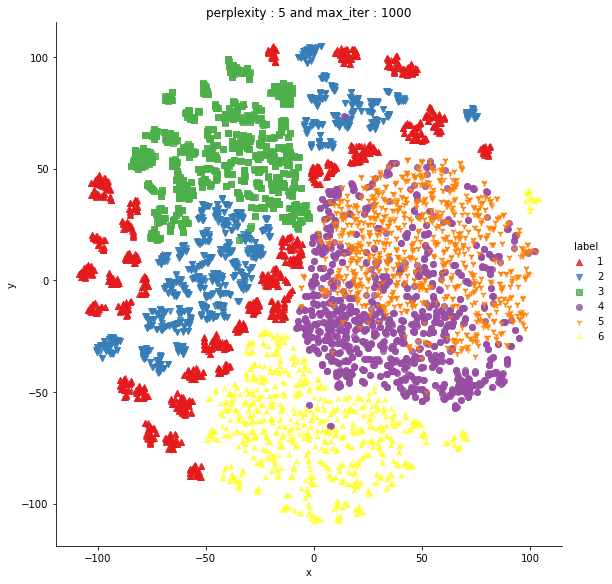

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.008s...


C:\Users\info\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\info\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 7352 samples in 3.240s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133827
[t-SNE] Computed conditional probabilities in 0.161s
[t-SNE] Iteration 50: error = 105.8484497, gradient norm = 0.0137333 (50 iterations in 4.069s)
[t-SNE] Iteration 100: error = 90.9581528, gradient norm = 0.0107657 (50 iterations in 3.347s)
[t-SNE] Iteration 150: error = 87.4532013, gradient norm = 0.0062857 (50 iterations in 2.926s)
[t-SNE] Iteration 200: error = 86.0859451, gradi

C:\Users\info\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


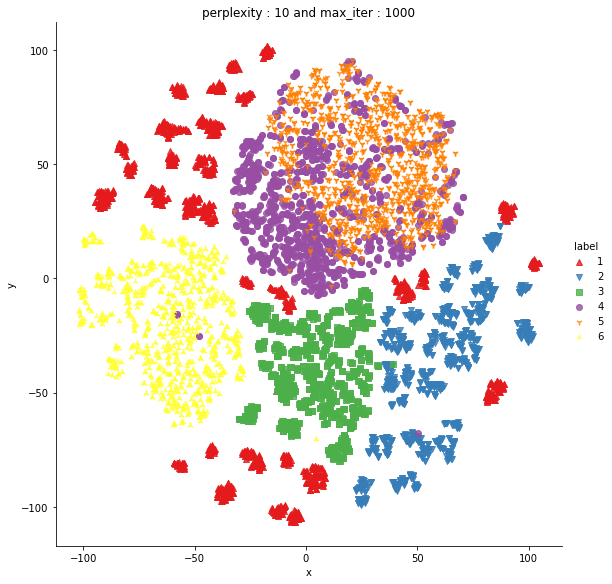

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.008s...


C:\Users\info\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\info\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 7352 samples in 3.331s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274336
[t-SNE] Computed conditional probabilities in 0.334s
[t-SNE] Iteration 50: error = 97.7373657, gradient norm = 0.0178960 (50 iterations in 4.175s)
[t-SNE] Iteration 100: error = 83.9112549, gradient norm = 0.0058484 (50 iterations in 3.522s)
[t-SNE] Iteration 150: error = 81.9177856, gradient norm = 0.0042817 (50 iterations in 3.290s)
[t-SNE] Iteration 200: error = 81.1933212, gradie

C:\Users\info\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


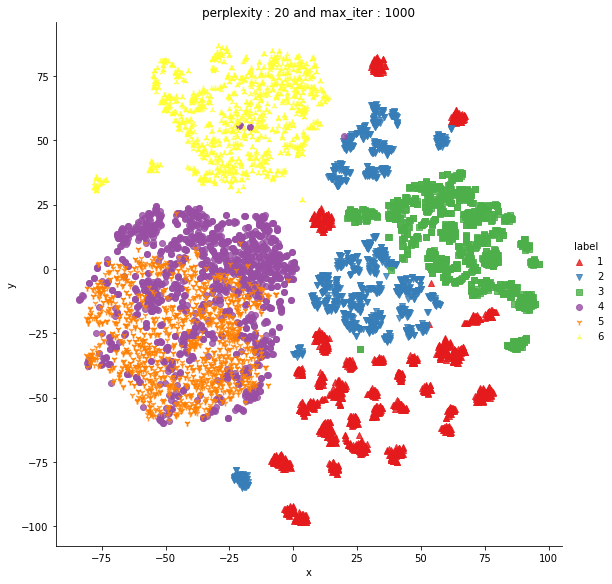

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.008s...


C:\Users\info\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\info\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 7352 samples in 3.444s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.805s
[t-SNE] Iteration 50: error = 83.2577896, gradient norm = 0.0321215 (50 iterations in 5.668s)
[t-SNE] Iteration 100: error = 75.5936508, gradient norm = 0.0041770 (50 iterations in 5.023s)
[t-SNE] Iteration 150: error = 74.6506729, gradient norm = 0.0021816 (50 iterations in 4.841s)
[t-SNE] Iteration 200: error = 74.3023987, gradie

C:\Users\info\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


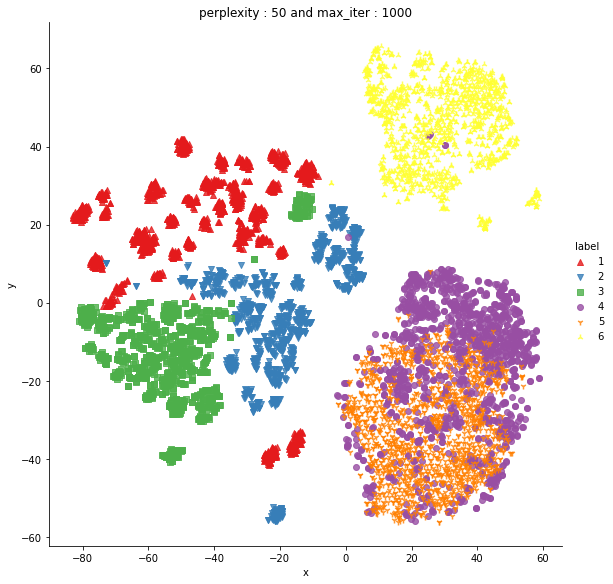

Done


In [10]:
perform_tsne(X_data = X_train,y_data=y_train, perplexities =[2,5,10,20,50])